## **Information about the dataset**

We used the [**Credit Card Default payment in Taiwan**]
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to **predict whether the credit card holders are defaulters or Non-defaulters**. The Dataset and its attributes are described below



1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/content/default of credit card clients.csv')


dataset.columns



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
dataset.isnull().sum()


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


No column contains any null value in the dataset.This saves our time in the pre processing.

In [4]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:

dataset.shape
dataset.drop('ID', axis = 1, inplace =True)

# Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

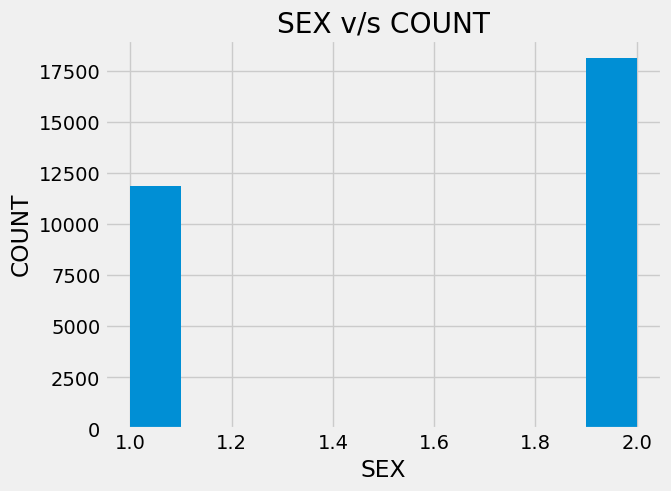

In [6]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

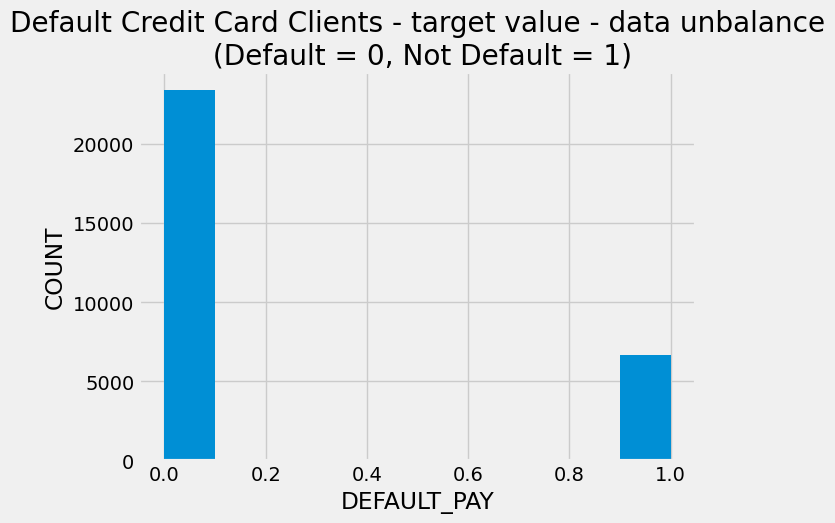

In [7]:
plt.style.use('fivethirtyeight')
dataset['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

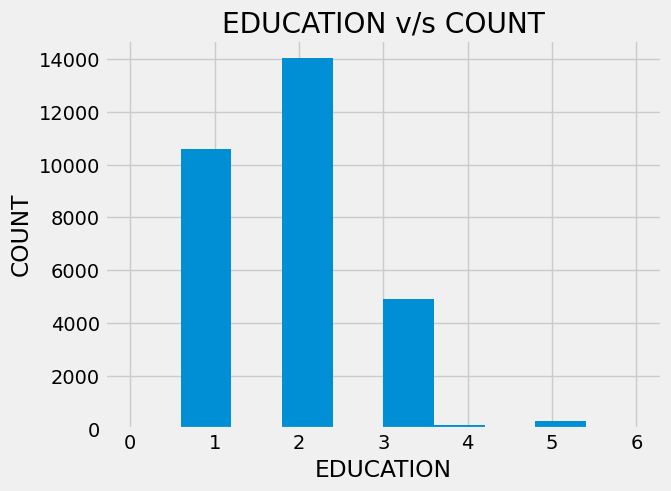

In [8]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

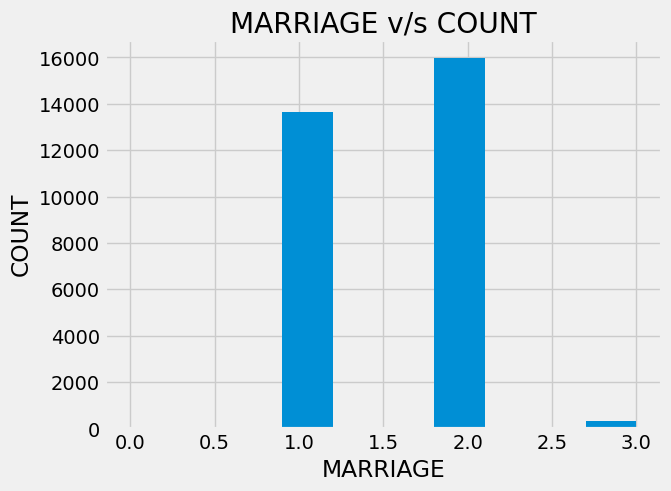

In [9]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

<Axes: xlabel='SEX', ylabel='count'>

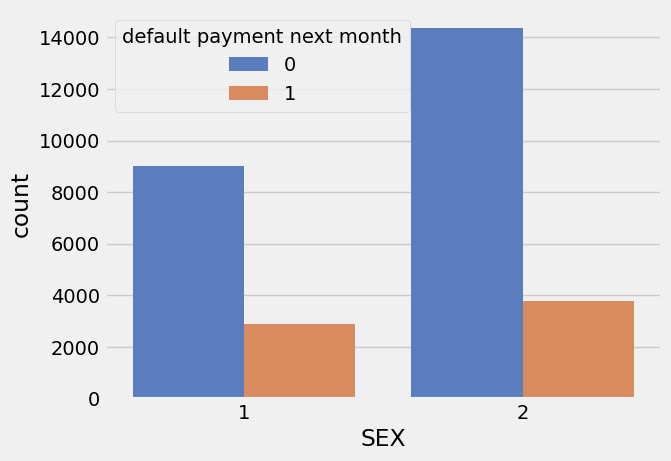

In [10]:

sns.countplot(x='SEX', data=dataset,hue="default payment next month", palette="muted")

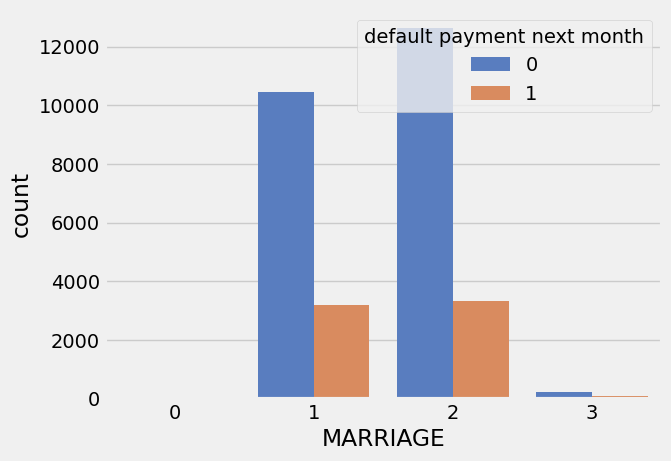

In [11]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="default payment next month", palette="muted")

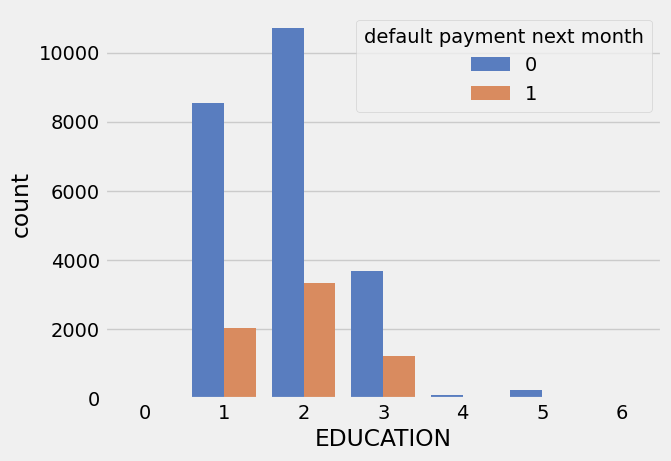

In [12]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="default payment next month", palette="muted")

<Axes: >

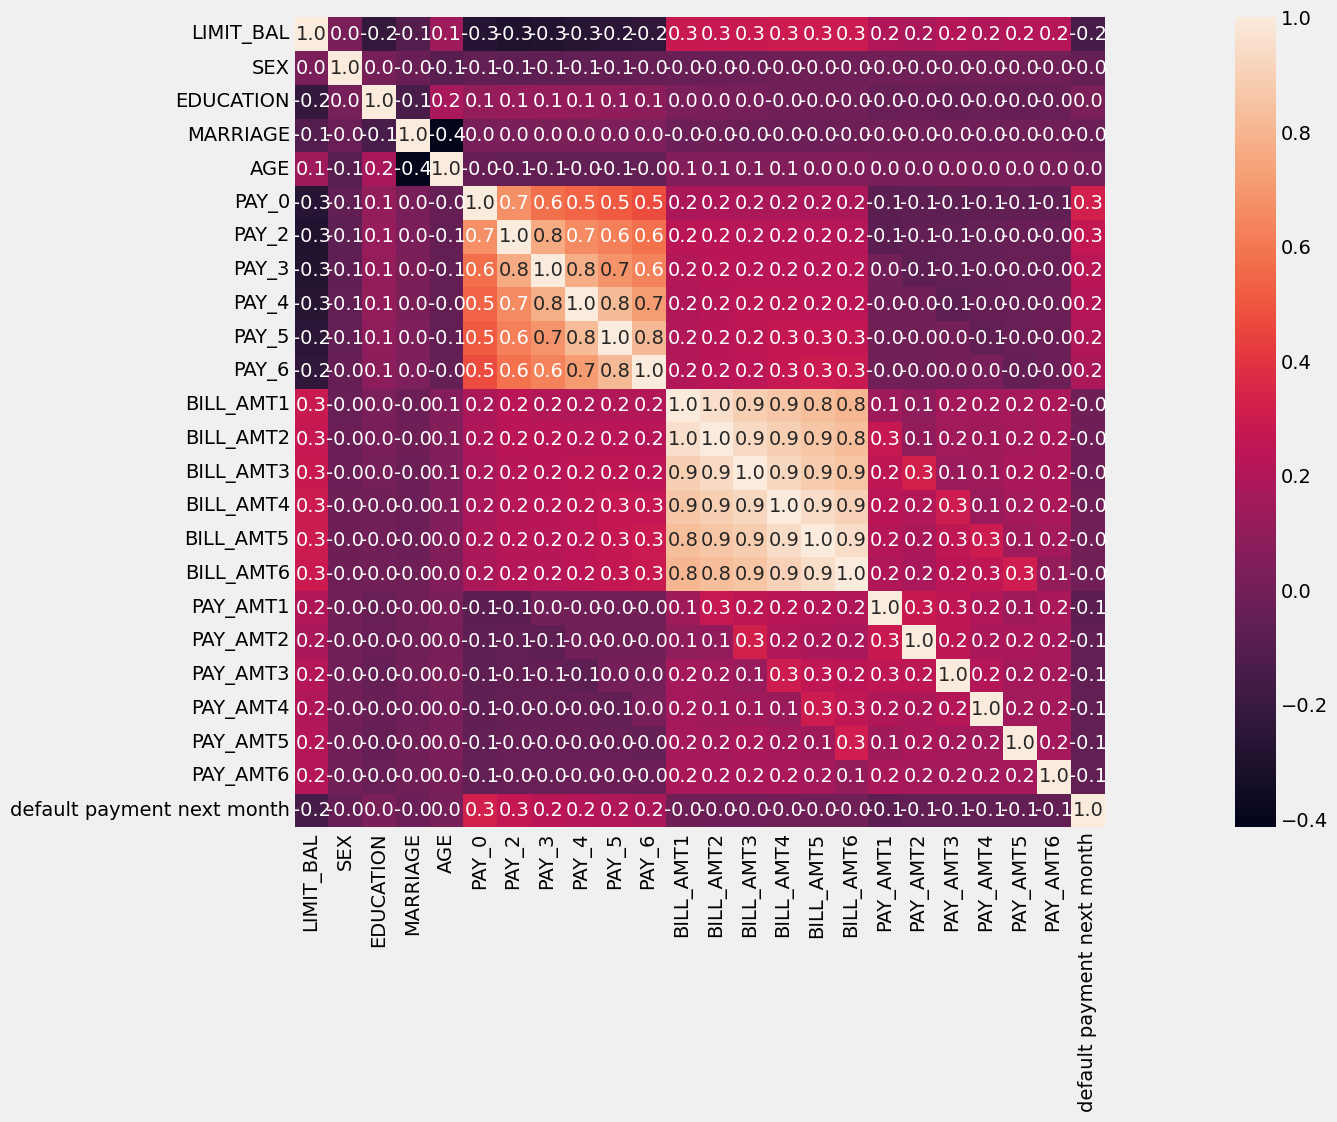

In [13]:
correlation = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

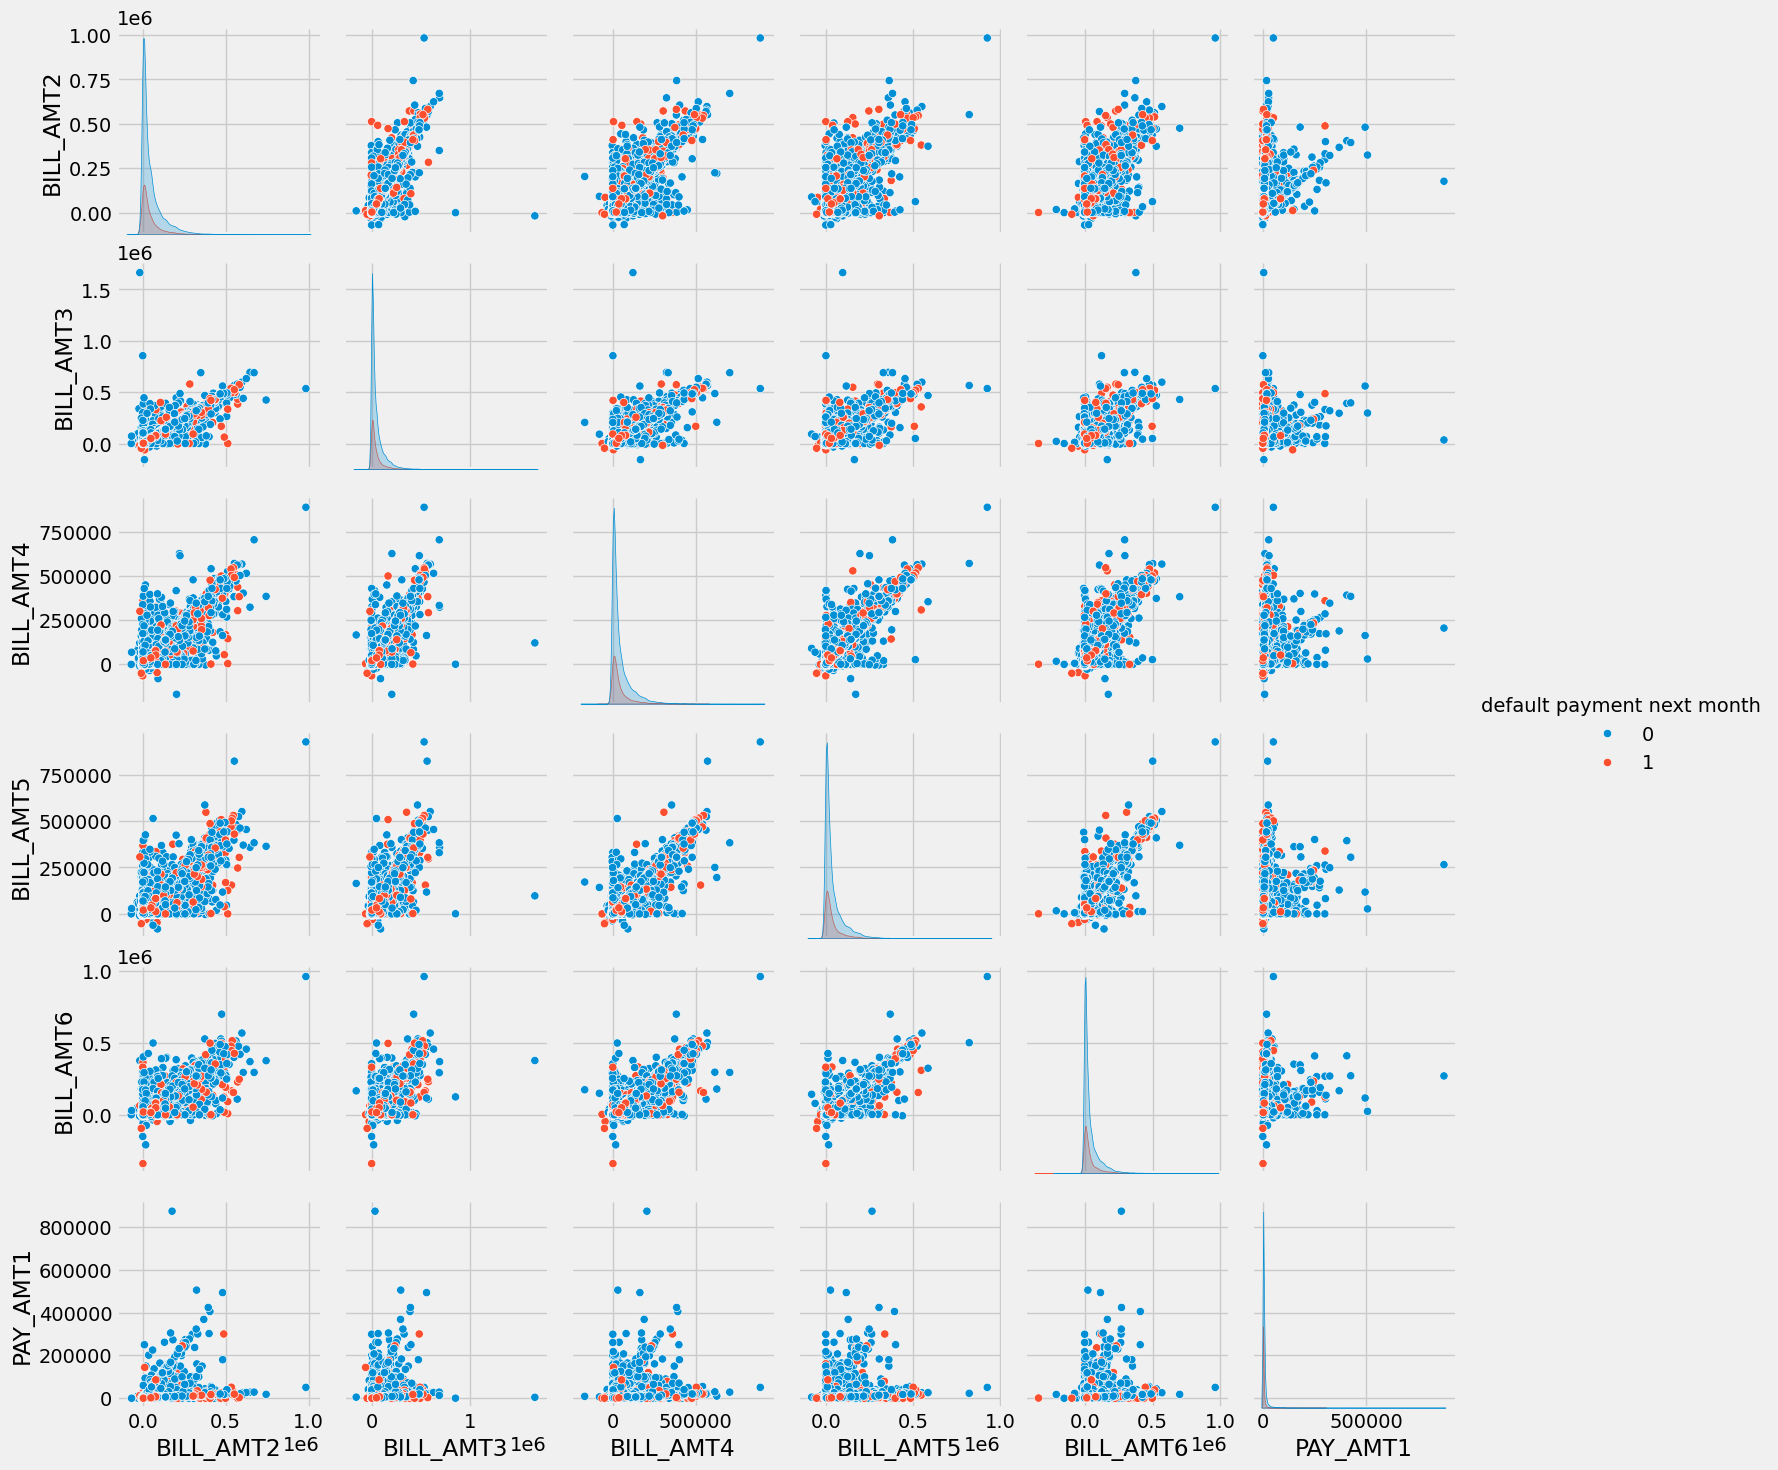

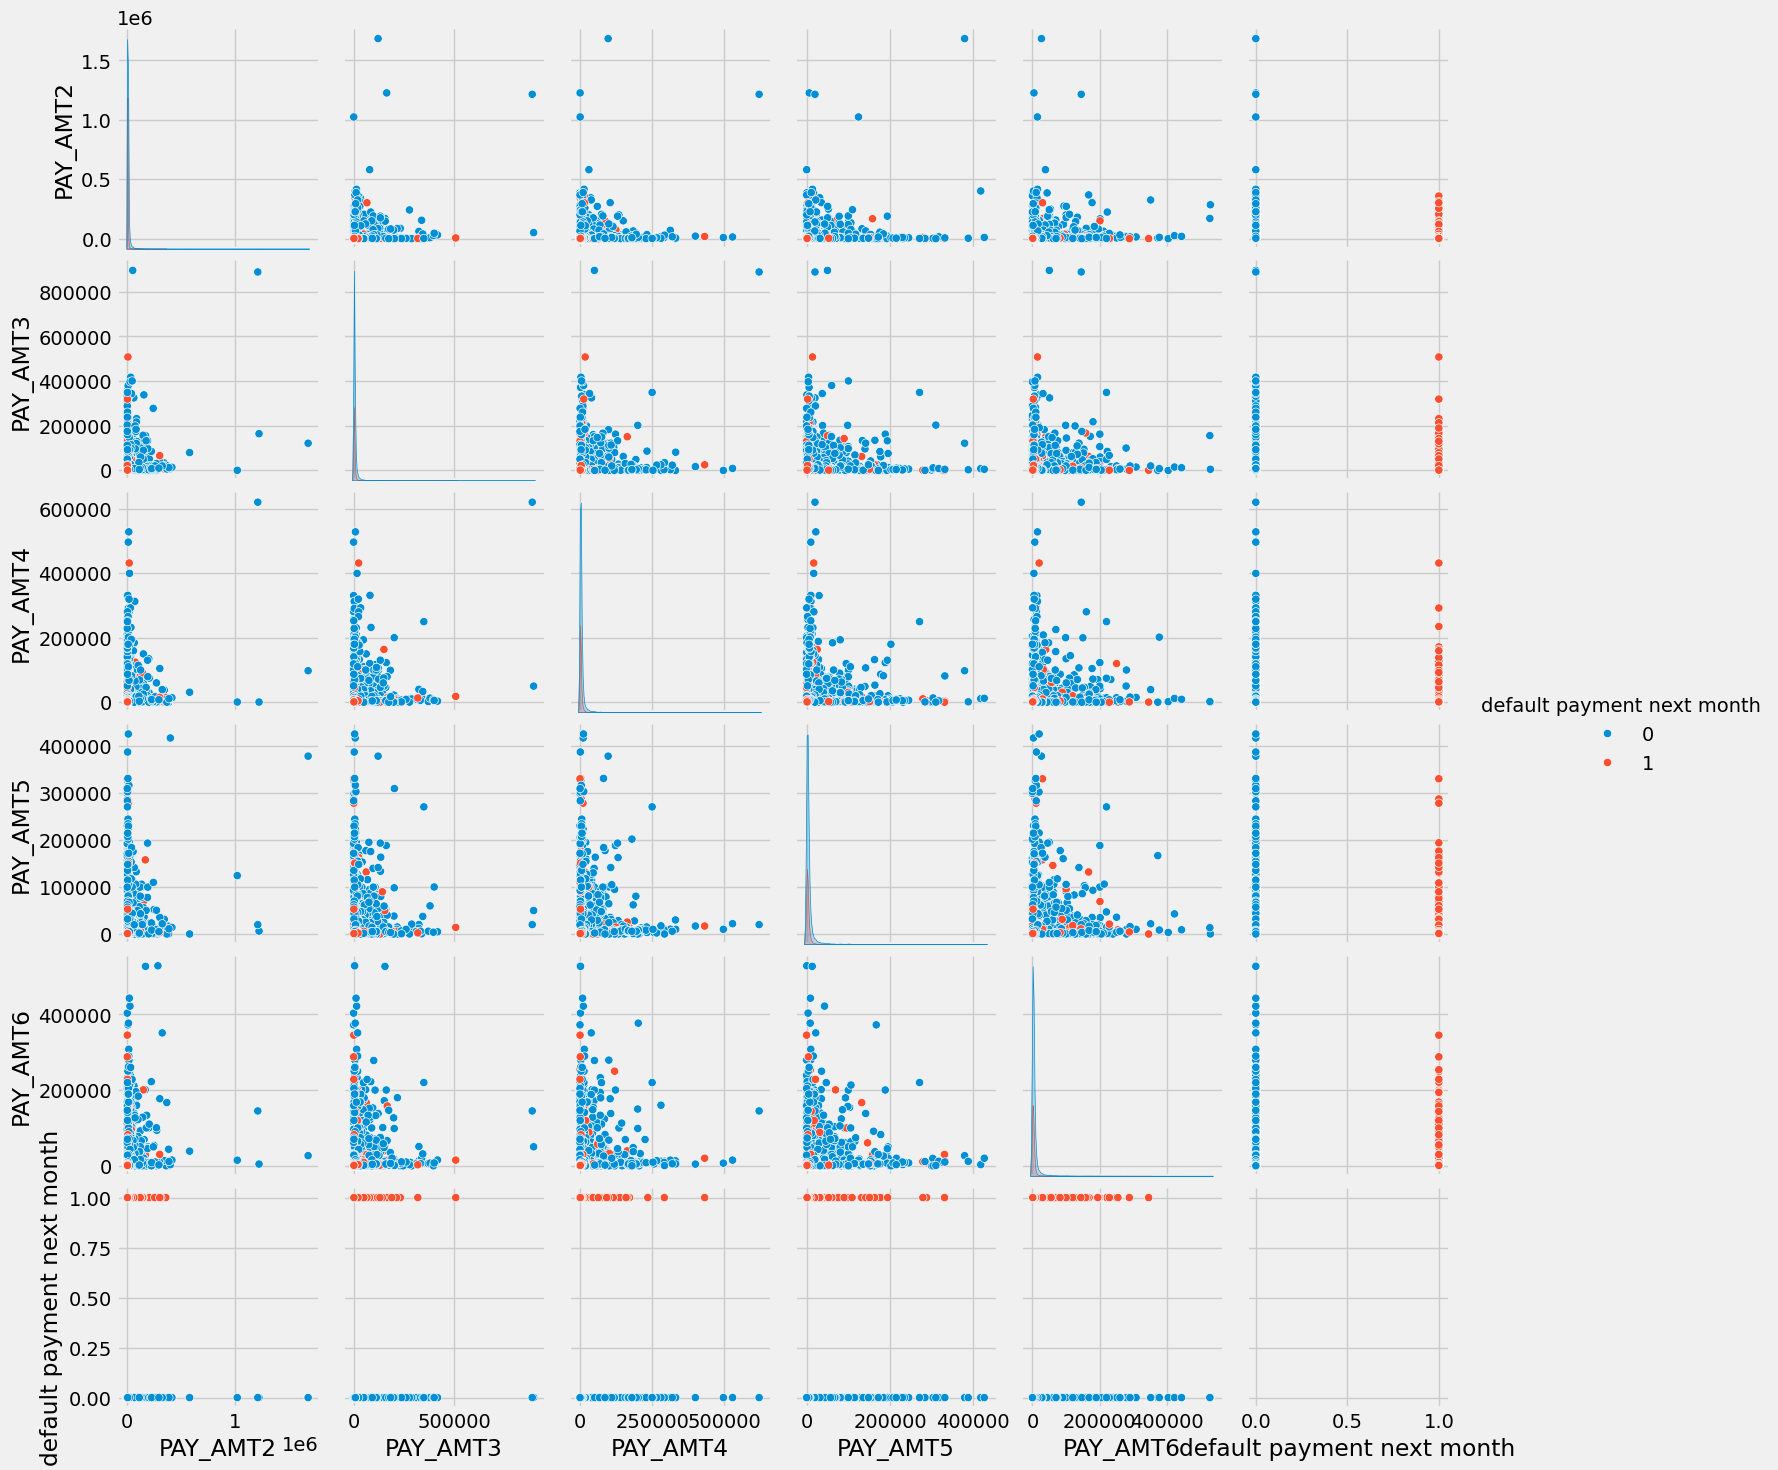

In [14]:
sns.pairplot(dataset, vars=dataset.columns[12:18], kind='scatter',hue= "default payment next month")
sns.pairplot(dataset, vars=dataset.columns[18:24],hue ="default payment next month")

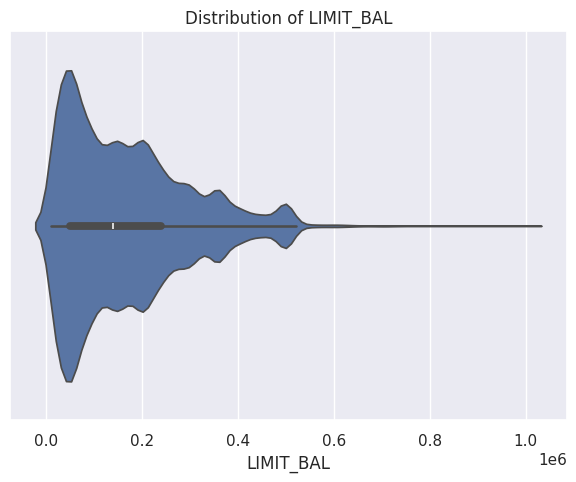

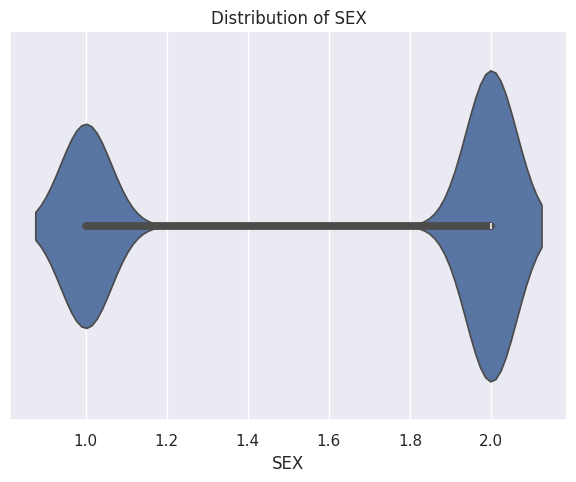

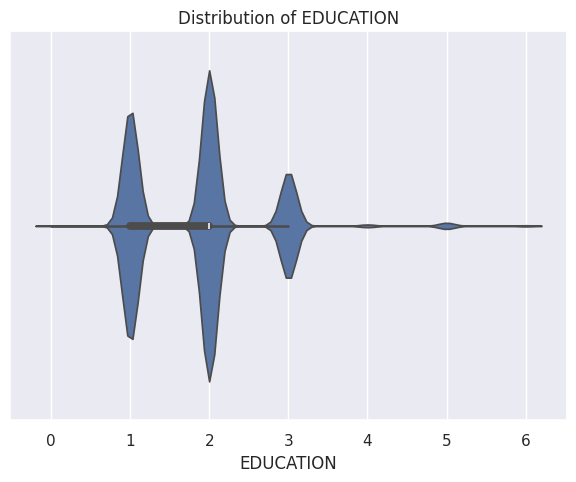

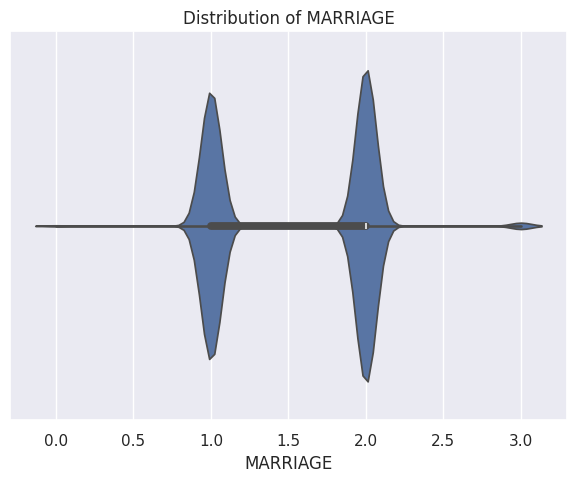

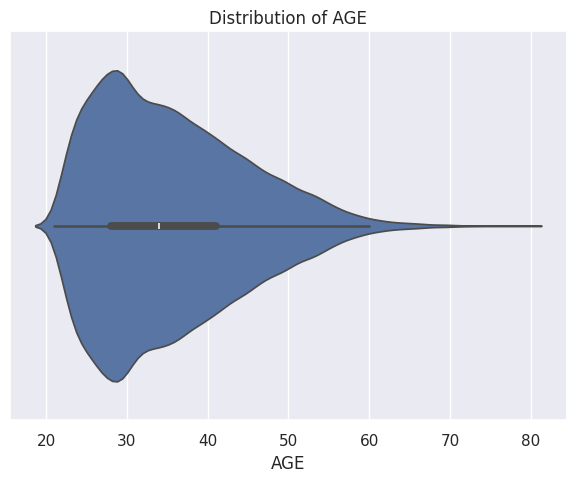

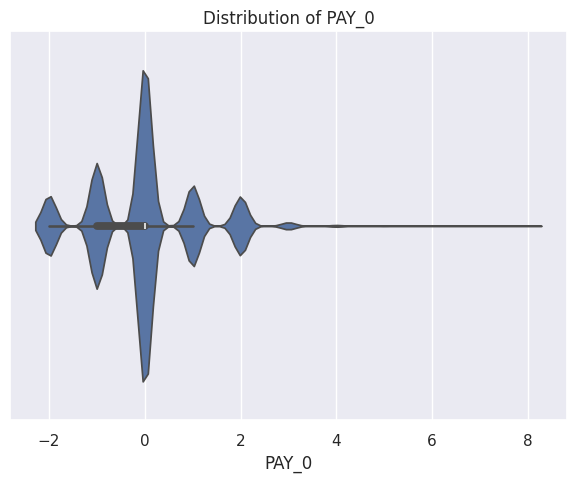

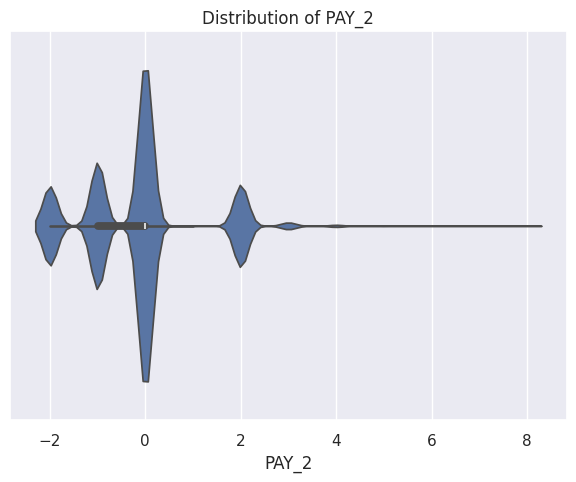

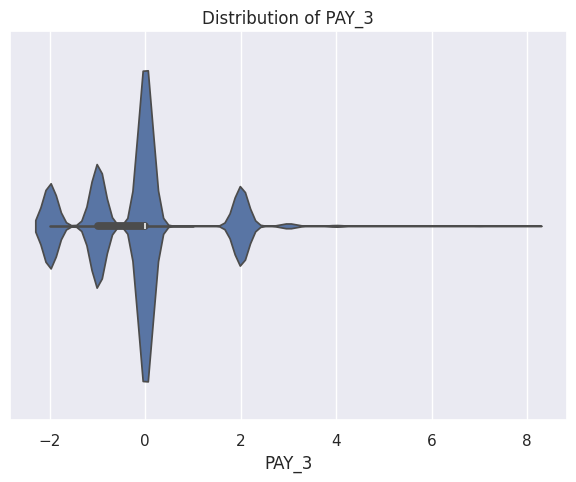

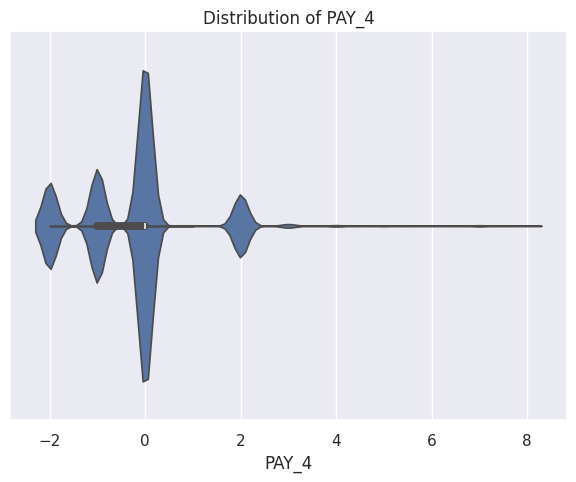

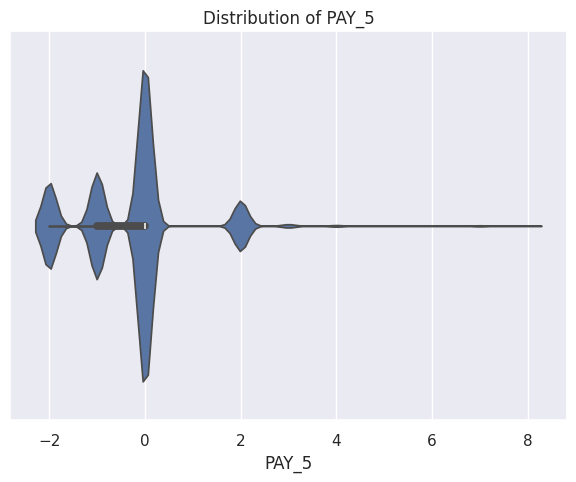

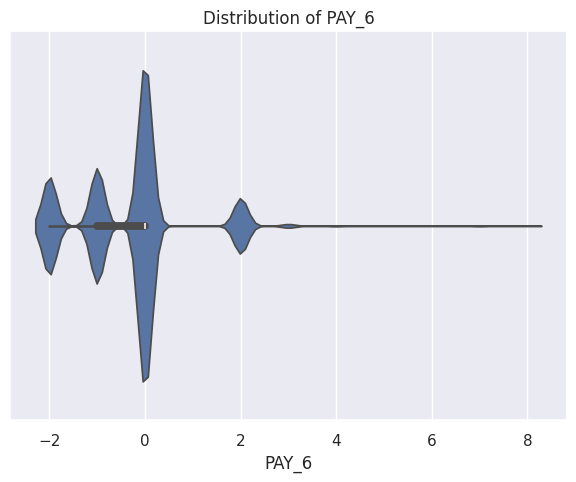

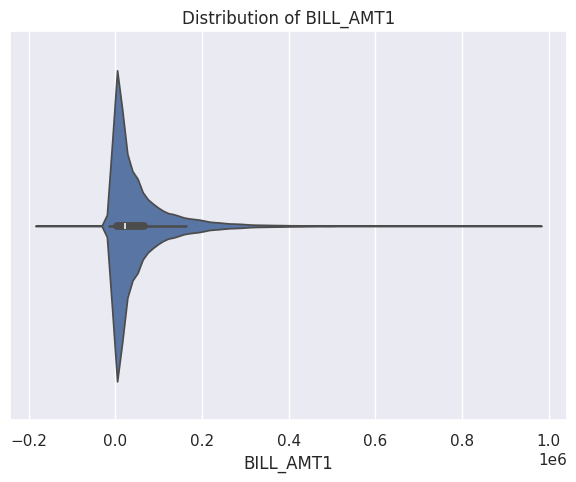

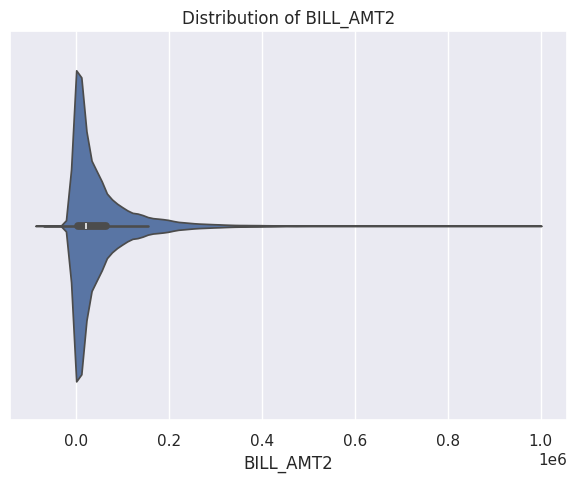

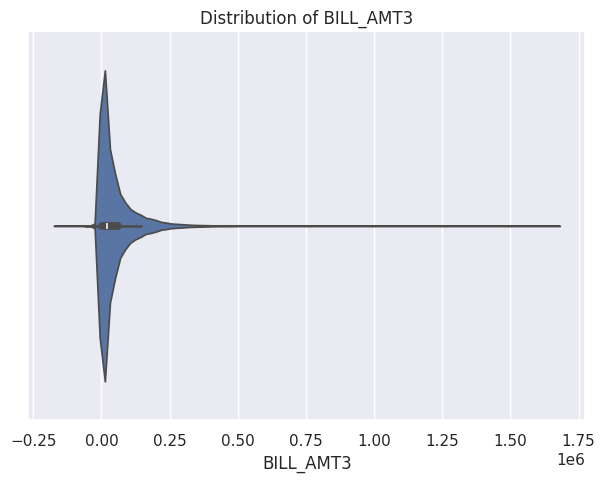

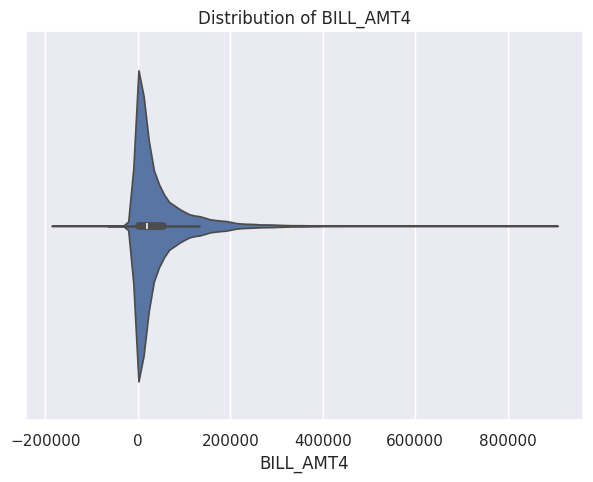

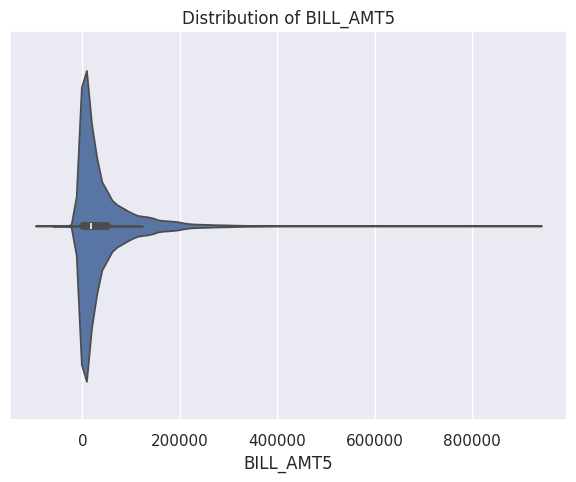

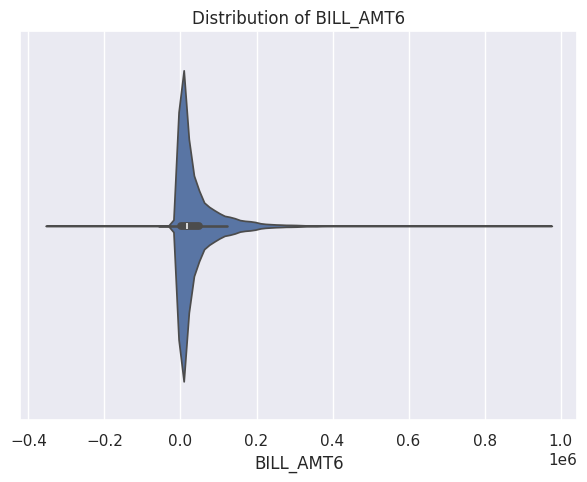

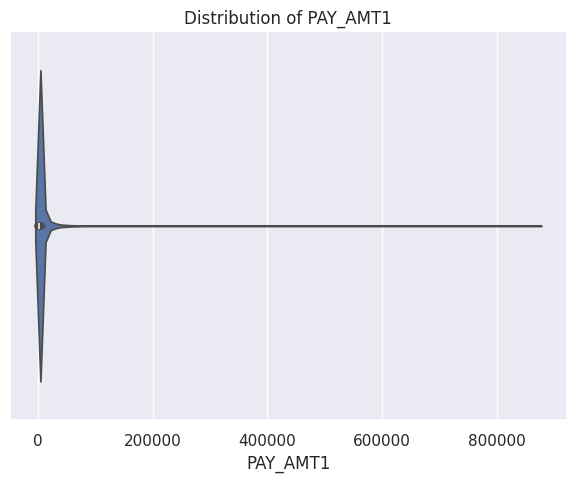

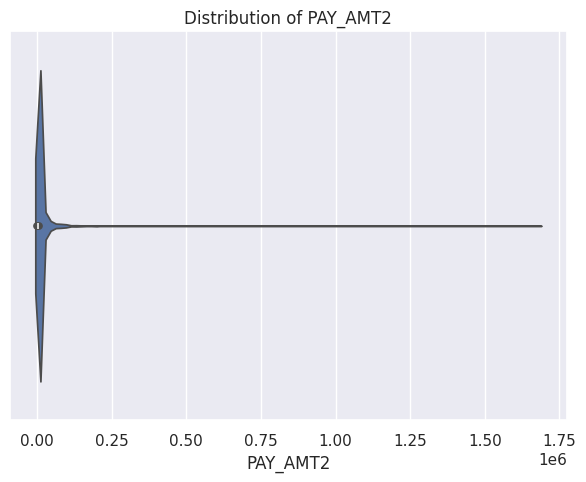

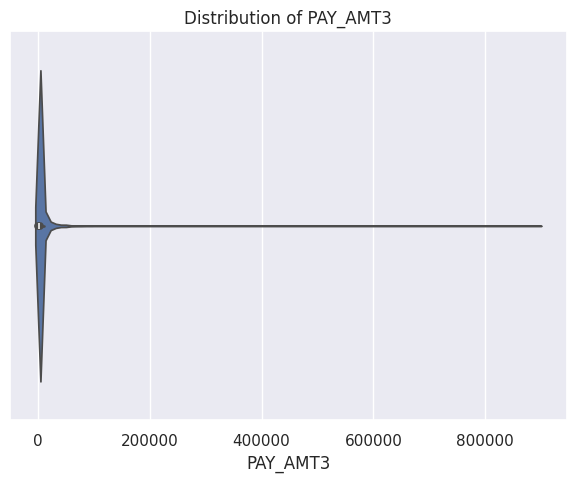

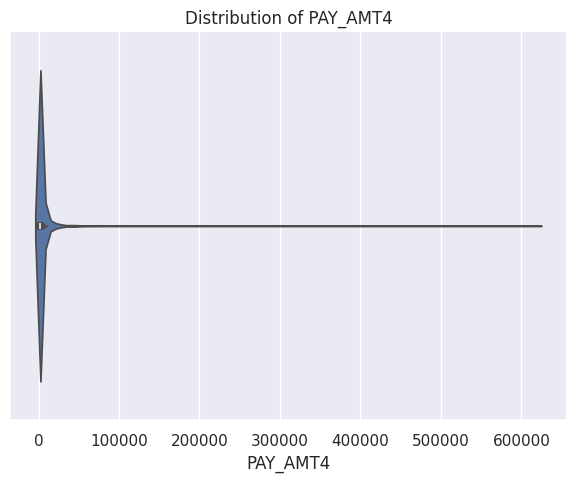

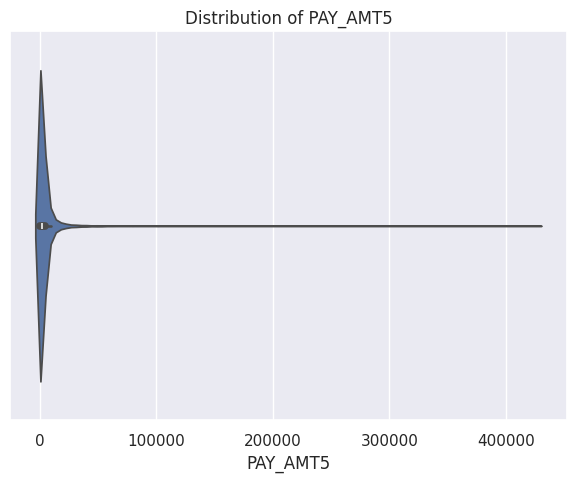

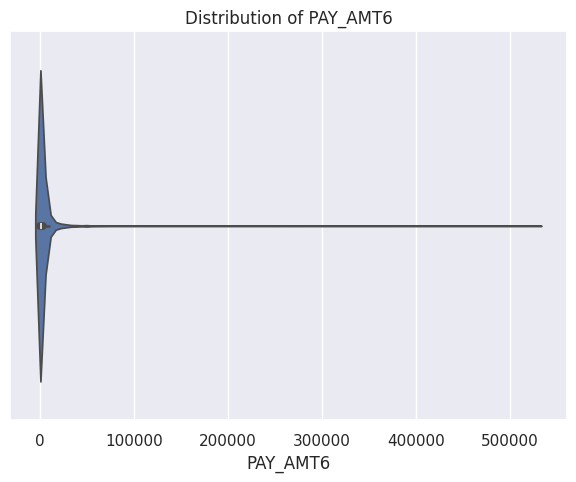

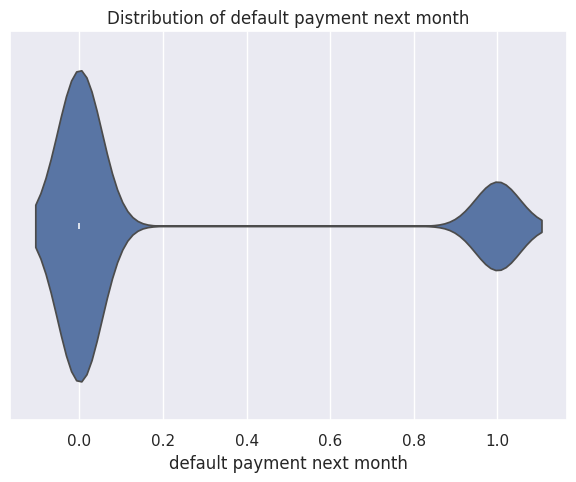

In [15]:


sns.set_theme()

for col in dataset.columns:
    sns.violinplot(x=col, data=dataset)
    plt.title(f'Distribution of {col}')
    plt.show()

# Applying scaling to the numerical features
Applied Min Max Scaling because we wanted to preserve the distribution of the numberical features.



In [16]:
col_to_norm = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler =StandardScaler()
scaler.fit(dataset[col_to_norm])
dataset[col_to_norm] = scaler.transform(dataset[col_to_norm])
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,-6.063298e-17,1.603733,1.853133,1.551867,-1.856885e-16,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200
std,1.000017e+00,0.489129,0.790349,0.521970,1.000017e+00,1.123802,1.197186,1.196868,1.169139,1.133187,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,-1.213794e+00,1.000000,0.000000,0.000000,-1.571479e+00,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,-9.054983e-01,1.000000,1.000000,1.000000,-8.120745e-01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,-2.118326e-01,2.000000,2.000000,2.000000,-1.611565e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,5.589071e-01,2.000000,2.000000,2.000000,5.982479e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,6.416528e+00,2.000000,6.000000,3.000000,4.720729e+00,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


# One Hot Encoding for cateogorical variable

In [17]:
categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4',
                   'PAY_5','PAY_6']
dataset[categorical_vars] = dataset[categorical_vars].astype(str)
dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
dataset.shape

(30000, 83)

# Split the dataset

In [18]:

X = dataset.drop('default payment next month', axis=1)
Y = dataset['default payment next month']


unique_values, counts = np.unique(Y, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Unique values: [0 1]
Counts: [23364  6636]


In [19]:
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(21000, 82)
(9000, 82)
Training set:
 + Non-defaulters (y=0): 16324
 + Defaulters (y=1):	 4676
Test set:
 + Non-defaulters (y=0): 7040
 + Defaulters (y=1):	 1960


# Applying PCA

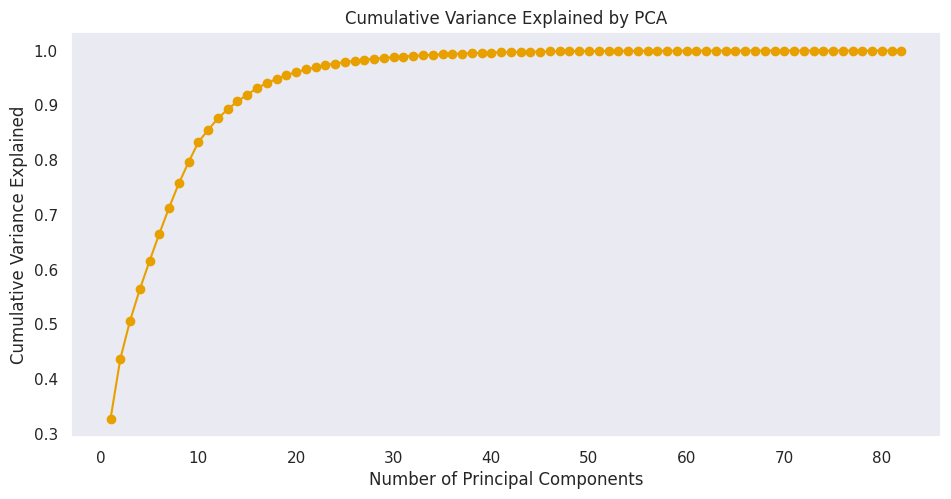

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='#e8a000')
plt.title('Cumulative Variance Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

We can see that  with just 40 component we can explain the variance around 100%.

In [21]:
n_pc = 40
pca = PCA(n_components=n_pc)
pca.fit(X_train)
#   X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
X_40d_train_val = pd.DataFrame(pca.transform(X_train))
X_40d_test = pd.DataFrame(pca.transform(X_test))
X_40d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_40d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_40d_train_val.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-2.071735,0.933525,1.718030,-0.386343,-0.098252,-0.900683,-0.055211,-0.136465,0.162732,0.333783,...,0.017496,-0.034801,-0.013639,0.019953,-0.001241,0.016815,-0.012993,-0.034353,0.031097,0.019710
1,-1.823855,0.196724,-1.099286,-1.024642,-0.489868,-0.489268,-0.373394,-0.251426,-0.205237,-0.538648,...,-0.021730,0.016158,0.000661,0.000193,-0.001255,0.003954,-0.001149,-0.032165,-0.062442,-0.027452
2,-0.342207,-0.657676,0.155673,0.454224,0.187019,-0.183295,-0.438523,-0.083968,-0.578864,-1.426122,...,-0.057486,0.095043,-0.142025,-0.075012,-0.028127,-0.061692,0.012053,-0.042009,-0.046643,-0.031753
3,1.059814,-0.338545,2.425139,1.050070,-0.064957,-0.487459,-0.124883,-0.077292,-0.325839,-0.874817,...,0.341821,-0.340257,0.171438,-0.135613,0.070600,0.250503,-0.240576,0.301269,0.207473,0.238428
4,-0.775377,1.699160,0.267816,-0.550671,0.822750,0.681421,0.386264,-0.535091,-0.459020,-0.010525,...,-0.083828,0.339737,-0.055249,0.186712,-0.048018,-0.163442,0.043282,-0.077191,0.011499,-0.066871


In [22]:
X_train = X_40d_train_val
X_test = X_40d_test
print(f"PCA APPLIED")
print(X_train.shape)
print(X_test.shape)

PCA APPLIED
(21000, 40)
(9000, 40)


# Applying Logistic Regression

In [23]:
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred_lg = logmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred_lg)
prec = precision_score(y_test, y_pred_lg)
rec = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)
roc=roc_auc_score(y_test, y_pred_lg)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Accuracy:  0.821
Precision:  0.6767983789260384
Recall:  0.3408163265306122
F1 Score:  0.4533423820834747
ROC AUC Score:  0.647751913265306


<Axes: >

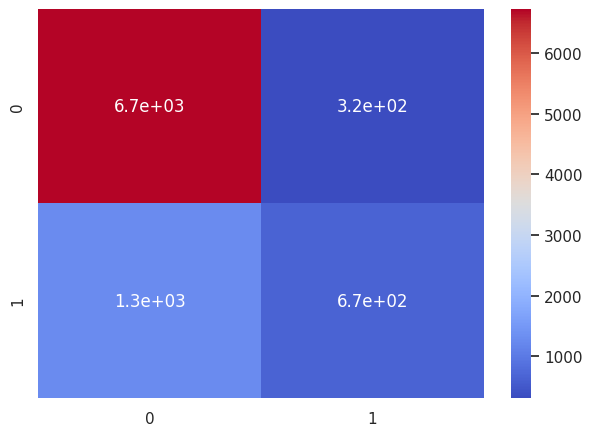

In [24]:
matrix=confusion_matrix(y_test,y_pred_lg)
sns.heatmap(matrix,annot=True,cmap='coolwarm')

# Applying Gaussian Naive Bayes

In [25]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred_nb =naive_bayes.predict(X_test)


roc=roc_auc_score(y_test, y_pred_nb)
acc = accuracy_score(y_test,y_pred_nb)
prec = precision_score(y_test,y_pred_nb)
rec = recall_score(y_test,y_pred_nb)
f1 = f1_score(y_test,y_pred_nb)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Accuracy:  0.6905555555555556
Precision:  0.3801916932907348
Recall:  0.6678571428571428
F1 Score:  0.48454562280214697
ROC AUC Score:  0.6823660714285714


<Axes: >

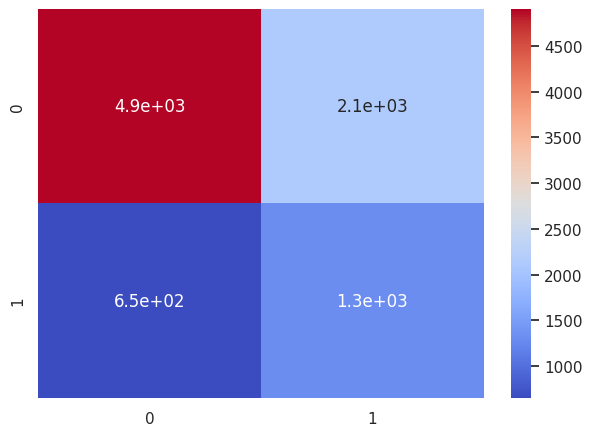

In [26]:
matrix=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(matrix,annot=True,cmap='coolwarm')

# Applying Decision Tree

In [27]:
dct = DecisionTreeClassifier(criterion = 'gini',random_state = 5000)
dct.fit(X_train,y_train)
y_pred_dt = dct.predict(X_test)

acc = accuracy_score(y_test,y_pred_dt)
prec = precision_score(y_test,y_pred_dt)
rec = recall_score(y_test,y_pred_dt)
f1 = f1_score(y_test,y_pred_dt)
roc=roc_auc_score(y_test, y_pred_dt)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Accuracy:  0.7247777777777777
Precision:  0.37433155080213903
Recall:  0.39285714285714285
F1 Score:  0.38337067463281055
ROC AUC Score:  0.6050223214285714


<Axes: >

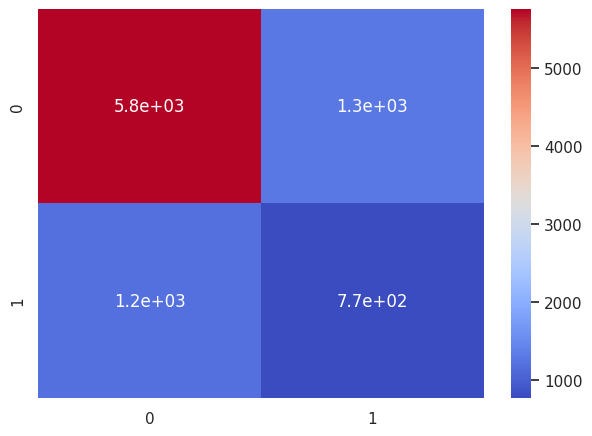

In [28]:
matrix=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(matrix,annot=True,cmap='coolwarm')

# Applying Random Forest Classifier

In [29]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'gini',random_state = 0)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test,y_pred_rf)
f1 = f1_score(y_test,y_pred_rf)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Accuracy:  0.8135555555555556
Precision:  0.6330188679245283
Recall:  0.3423469387755102
F1 Score:  0.44437086092715233
ROC AUC Score:  0.6435456284786643


<Axes: >

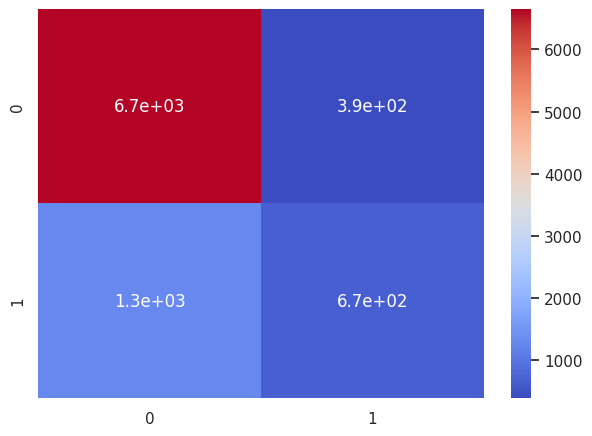

In [30]:
matrix=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(matrix,annot=True,cmap='coolwarm')

# Applying SVM

0
1
2


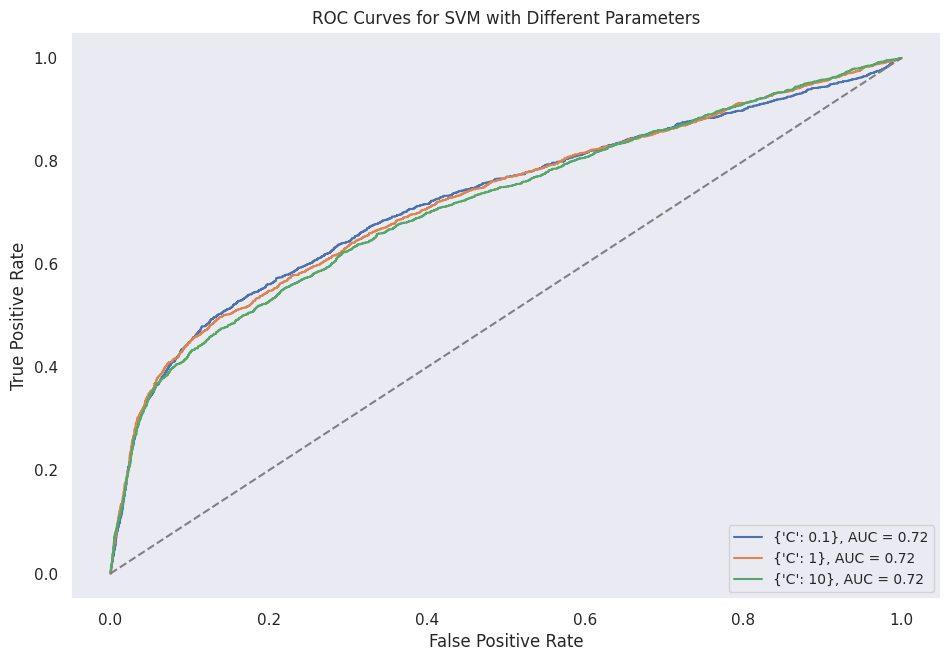

SVM Performance Metrics:
   Parameters   ROC AUC  Accuracy  Precision    Recall  F1-Score
0  {'C': 0.1}  0.724618  0.817222   0.702182  0.279082  0.399416
1    {'C': 1}  0.723731  0.820667   0.694820  0.314796  0.433287
2   {'C': 10}  0.715989  0.817889   0.668770  0.324490  0.436963


In [31]:
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC

svm_param_grid = {
    "C": [0.1, 1, 10],
}

svm_results = []

plt.figure(figsize=(10, 7))

counter=0
for params in ParameterGrid(svm_param_grid):
    print(counter)
    counter+=1
    svm = SVC(probability=True, random_state=1, **params)

    svm.fit(X_train, y_train)

    y_pred_prob = svm.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= 0.5).astype(int)


    roc_auc = roc_auc_score(y_test, y_pred_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    svm_results.append({
        "Parameters": params,
        "ROC AUC": roc_auc,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{params}, AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curves for SVM with Different Parameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize="small")
plt.grid()
plt.show()


svm_results_df = pd.DataFrame(svm_results)
print("SVM Performance Metrics:")
print(svm_results_df.sort_values(by="ROC AUC", ascending=False))


getting the best result for c=1

<Axes: >

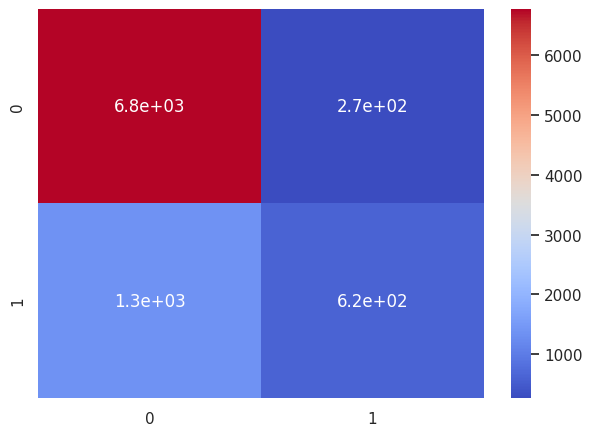

In [32]:
svm = SVC(probability=True, random_state=1, C=1)

svm.fit(X_train, y_train)

y_pred_prob = svm.predict_proba(X_test)[:, 1]
y_pred_svm= (y_pred_prob >= 0.5).astype(int)
matrix=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrix,annot=True,cmap='coolwarm')


# Applying KNN

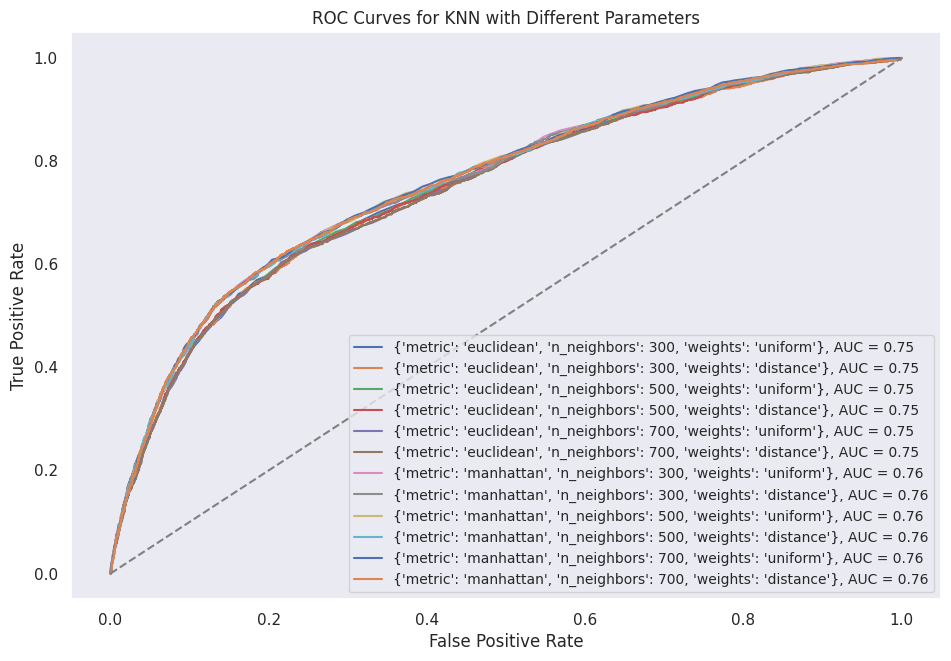

KNN Performance Metrics:
                                           Parameters   ROC AUC  Accuracy  \
10  {'metric': 'manhattan', 'n_neighbors': 700, 'w...  0.758963  0.796667   
8   {'metric': 'manhattan', 'n_neighbors': 500, 'w...  0.758396  0.798556   
6   {'metric': 'manhattan', 'n_neighbors': 300, 'w...  0.757965  0.801778   
11  {'metric': 'manhattan', 'n_neighbors': 700, 'w...  0.757094  0.797222   
9   {'metric': 'manhattan', 'n_neighbors': 500, 'w...  0.756780  0.800222   
7   {'metric': 'manhattan', 'n_neighbors': 300, 'w...  0.756421  0.802222   
2   {'metric': 'euclidean', 'n_neighbors': 500, 'w...  0.749096  0.797778   
0   {'metric': 'euclidean', 'n_neighbors': 300, 'w...  0.748907  0.798556   
3   {'metric': 'euclidean', 'n_neighbors': 500, 'w...  0.747601  0.797889   
1   {'metric': 'euclidean', 'n_neighbors': 300, 'w...  0.747276  0.798889   
4   {'metric': 'euclidean', 'n_neighbors': 700, 'w...  0.747176  0.795444   
5   {'metric': 'euclidean', 'n_neighbors': 700, 'w.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {
    "n_neighbors": [300, 500, 700],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}


knn_results = []

plt.figure(figsize=(10, 7))

for params in ParameterGrid(knn_param_grid):

    knn = KNeighborsClassifier(**params)

    knn.fit(X_train, y_train)


    y_pred_prob = knn.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= 0.5).astype(int)


    roc_auc = roc_auc_score(y_test, y_pred_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_results.append({
        "Parameters": params,
        "ROC AUC": roc_auc,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })


    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{params}, AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curves for KNN with Different Parameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize="small")
plt.grid()
plt.show()

knn_results_df = pd.DataFrame(knn_results)
print("KNN Performance Metrics:")
print(knn_results_df.sort_values(by="ROC AUC", ascending=False))


getting one of the best result for metric=manhattan , n_neighbour=500, weights=uniform

<Axes: >

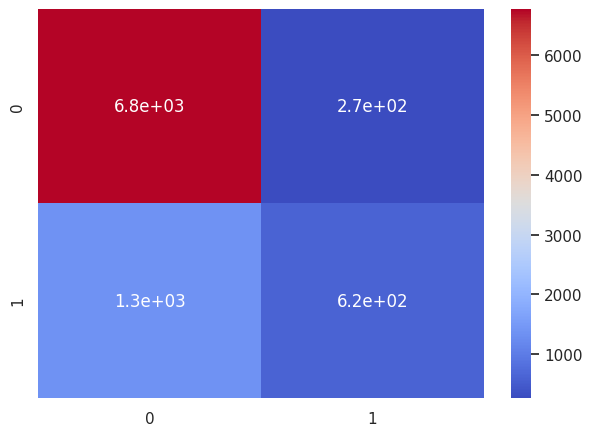

In [41]:
knn = KNeighborsClassifier(n_neighbors=500,metric='manhattan',weights='distance')

knn.fit(X_train, y_train)


y_pred_prob = knn.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)
matrix=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrix,annot=True,cmap='coolwarm')
